In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/planecrashinfo_20181121001952.csv")

# Display first few rows
print(df.head())

# Basic info
print(df.info())

# Summary stats
print(df.describe(include='all'))


                 date     time                            location  \
0  September 17, 1908    17:18                 Fort Myer, Virginia   
1  September 07, 1909        ?             Juvisy-sur-Orge, France   
2       July 12, 1912    06:30           Atlantic City, New Jersey   
3     August 06, 1913        ?  Victoria, British Columbia, Canada   
4  September 09, 1913  c 18:30                  Over the North Sea   

                 operator flight_no          route                 ac_type  \
0    Military - U.S. Army         ?  Demonstration        Wright Flyer III   
1                       ?         ?       Air show          Wright Byplane   
2    Military - U.S. Navy         ?    Test flight               Dirigible   
3                 Private         ?              ?        Curtiss seaplane   
4  Military - German Navy         ?              ?  Zeppelin L-1 (airship)   

  registration cn_ln                       aboard  \
0            ?     1   2   (passengers:1  crew:1)   
1   

In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop columns with too many missing values (if any)
df = df.dropna(thresh=len(df)*0.5, axis=1)

# Fill missing values or drop rows
print(df.columns.tolist())
# Remove leading/trailing whitespace and convert to title case
df.columns = df.columns.str.strip().str.title()
print(df.columns.tolist())

df = df.dropna(subset=['Date', 'Location'])  # essential columns
df = df.fillna('Unknown')  # for less critical missing info

# Check for duplicates
df = df.drop_duplicates()


date            0
time            0
location        0
operator        0
flight_no       0
route           1
ac_type         0
registration    0
cn_ln           0
aboard          0
fatalities      0
ground          0
summary         0
dtype: int64
['date', 'time', 'location', 'operator', 'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'aboard', 'fatalities', 'ground', 'summary']
['Date', 'Time', 'Location', 'Operator', 'Flight_No', 'Route', 'Ac_Type', 'Registration', 'Cn_Ln', 'Aboard', 'Fatalities', 'Ground', 'Summary']


In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

crashes_per_year = df['Year'].value_counts().sort_index()

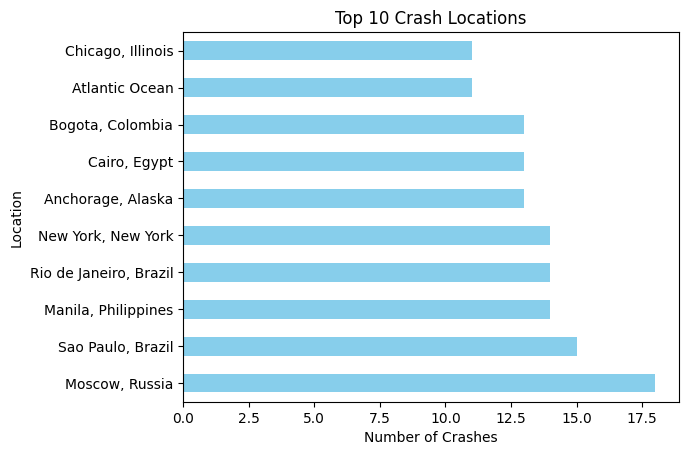

In [10]:
top_locations = df['Location'].value_counts().head(10)

top_locations.plot(kind='barh', color='skyblue')
plt.title("Top 10 Crash Locations")
plt.xlabel("Number of Crashes")
plt.ylabel("Location")
plt.show()


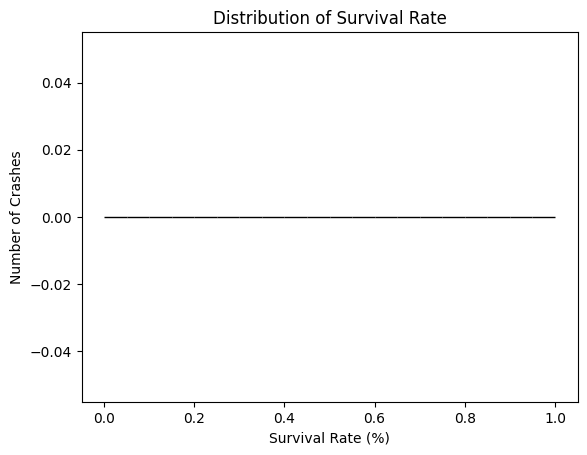

In [11]:
# Check if 'Aboard' and 'Fatalities' columns are available
df[['Aboard', 'Fatalities']] = df[['Aboard', 'Fatalities']].apply(pd.to_numeric, errors='coerce')

df['Survivors'] = df['Aboard'] - df['Fatalities']
df['Survival Rate'] = (df['Survivors'] / df['Aboard']) * 100

plt.hist(df['Survival Rate'].dropna(), bins=20, color='green', edgecolor='black')
plt.title("Distribution of Survival Rate")
plt.xlabel("Survival Rate (%)")
plt.ylabel("Number of Crashes")
plt.show()


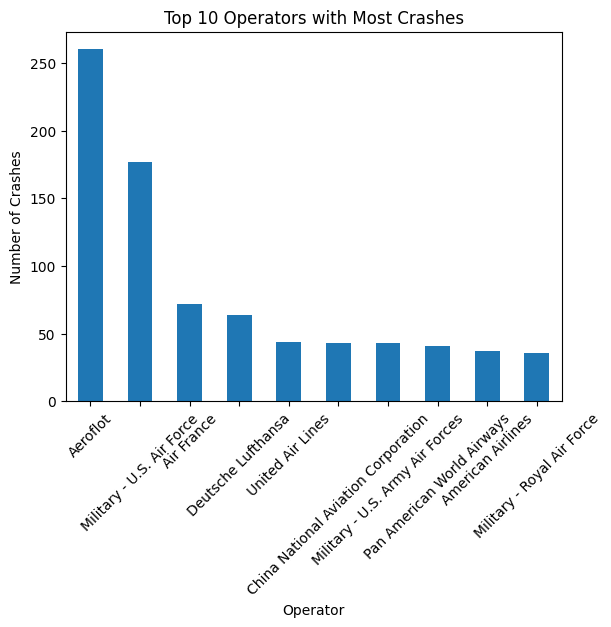

In [14]:
#Business questions and insights
#1.Which operator has had the most crashes?
df['Operator'].value_counts().head(10).plot(kind='bar', title='Top 10 Operators with Most Crashes')
plt.xlabel('Operator')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()




In [28]:
#2.Crashes by time of day (if Time column exists)?

from datetime import datetime

def extract_hour(val):
    try:
        return datetime.strptime(val.strip(), '%H:%M').hour
    except:
        try:
            return datetime.strptime(val.strip(), '%I:%M %p').hour
        except:
            return None  # if parsing fails

# Apply only if 'time' column exists
if 'time' in df.columns:
    df['hour'] = df['time'].astype(str).apply(extract_hour)
    hour_counts = df['hour'].value_counts().sort_index()

    hour_df = hour_counts.reset_index()
    hour_df.columns = ['Hour', 'Crash_Count']
    print(hour_df)
else:
    print("No 'time' column found in dataset.")


    Hour  Crash_Count
0    0.0           68
1    1.0           65
2    2.0           75
3    3.0           48
4    4.0           70
5    5.0           58
6    6.0           86
7    7.0          121
8    8.0          156
9    9.0          193
10  10.0          176
11  11.0          176
12  12.0          166
13  13.0          171
14  14.0          178
15  15.0          176
16  16.0          173
17  17.0          150
18  18.0          152
19  19.0          189
20  20.0          153
21  21.0          113
22  22.0          114
23  23.0          104


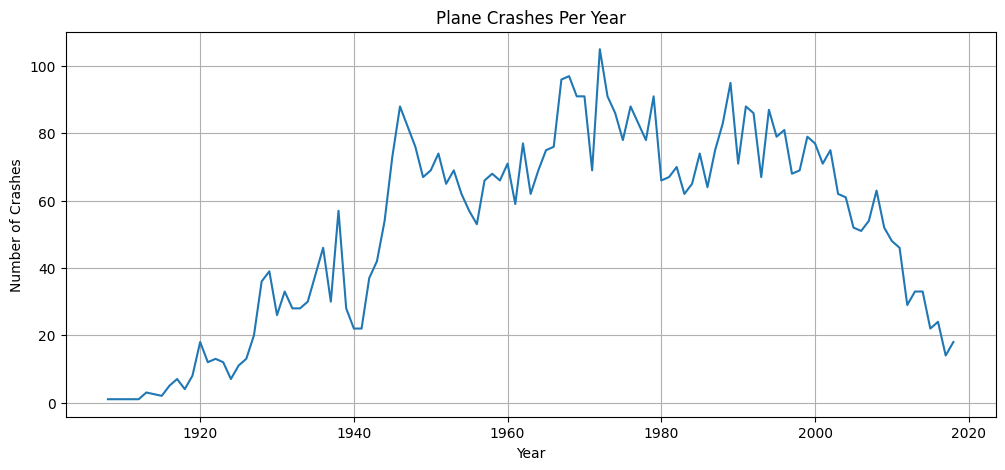

In [29]:
#3.How has the frequency of crashes changed over the years?
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year
yearly_crashes = df['year'].value_counts().sort_index()

yearly_crashes.plot(figsize=(12, 5), title='Plane Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid()
plt.show()


In [30]:
#4.What is the average survival rate across all crashes?
df['aboard'] = pd.to_numeric(df['aboard'], errors='coerce')
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

df['survivors'] = df['aboard'] - df['fatalities']
df['survival_rate'] = df['survivors'] / df['aboard']

print("Average Survival Rate: {:.2f}%".format(df['survival_rate'].mean() * 100))


Average Survival Rate: nan%
